<a href="https://colab.research.google.com/github/unique-subedi/gene-expression/blob/main/Unique_gene_expression_master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
import os
import datetime
import time
import math
import numpy as np
import scipy
from numpy import linalg as LA
import pandas as pd
import urllib.request
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

In [3]:
!pip install qnorm
import qnorm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached qnorm-0.8.1-py3-none-any.whl (15 kB)


In [4]:
!pip install pyreadr
import pyreadr
urllib.request.urlretrieve("https://raw.githubusercontent.com/unique-subedi/gene-expression/main/data/brain.rda", "brain.rda")
brain = pyreadr.read_r("brain.rda")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 363 kB 9.2 MB/s 


In [223]:
expression = pd.DataFrame(brain["expression"])
genes = pd.DataFrame(brain["genes"])
samples = pd.DataFrame(brain["samples"])
genes_c = genes[(pd.isna(genes.sym)) & (pd.isna(genes.chrom))]

In [168]:
genes.at["AFFX-BioDn-3_at", 'chrom'] = float("Nan")
genes_control = genes[['AFFX' in s for s in genes.index]]
genes_control = genes_control[['HUM' not in s for s in genes_control.index]]
genes_control = genes_control[['hum' not in s for s in genes_control.index]]
genes_bac_index = genes_control[genes_control.chrom.isnull() & genes_control.sym.isnull()].index

In [169]:
mean_bac_exp = expression[genes_bac_index].mean(axis=1)
std_bac_exp = expression[genes_bac_index].std(axis=1)
expression =  (expression - mean_bac_exp.values[:, None]).divide(std_bac_exp, axis=0)

`michigan` dataset contains the measurements, done at University of Michigan lab, of anterior cortex and dorsolateral cortex for each patient. 

`michigan_diff` subtracts measurement of anterior cortex from the dorsolateral cortex for each patient.

In [224]:
for i in range(len(expression)):
  ecdf = ECDF(expression.iloc[i, :].values)
  expression.iloc[i, :] = ecdf(expression.iloc[i, :].values)

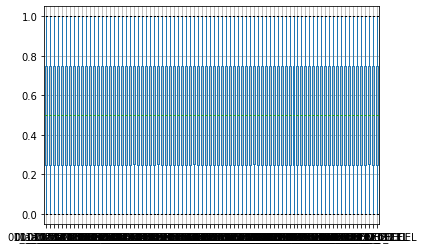

In [218]:
(expression.T).boxplot()

# Michigan

In [233]:
michigan = expression[(expression.index.str[5] == 'M') & (expression.index.str[3] != 'c') ]
#michigan = michigan.div(michigan.std(), axis ='columns')
michigan_diff = michigan.diff().iloc[1::2,:]
michigan_diff.index = "patient" + michigan_diff.index.str[:2]
michigan_diff.head()
michigan_diff


,1000_at,1001_at,1002_f_at,1003_s_at,1004_at,1005_at,1006_at,1007_s_at,1008_f_at,1009_at,...,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at,AFFX-hum_alu_at
patient01,0.024524,0.057381,0.063016,-0.016032,-0.070000,-0.001587,0.014127,0.102778,-0.029921,0.152460,...,-0.145635,-0.099286,-0.094048,-0.157698,-0.248333,-0.085794,-0.150635,-0.208810,-0.118413,0.0
patient02,-0.003175,-0.025794,-0.087857,-0.029444,-0.051349,0.055714,-0.093651,0.019286,-0.004365,0.006984,...,0.008333,-0.042460,-0.016508,-0.013810,-0.068571,0.017778,-0.004444,-0.070000,-0.052698,0.0
patient03,-0.019603,-0.075794,-0.063413,-0.025873,-0.065794,0.015952,0.046032,0.011905,0.001032,-0.003333,...,-0.014683,-0.005317,0.005556,-0.017460,-0.078016,-0.011270,0.027302,0.009762,-0.012937,0.0
patient04,-0.008175,0.011587,-0.026032,-0.050079,-0.123333,-0.088651,-0.026508,0.089444,-0.026270,0.001349,...,-0.081190,-0.036667,-0.021111,-0.052619,-0.103095,-0.051508,-0.020397,-0.029365,-0.032857,0.0
patient05,0.022460,0.033810,0.051905,-0.049365,-0.023810,0.093889,-0.017937,-0.012619,0.003413,-0.001270,...,0.002460,-0.035635,0.050873,-0.050952,-0.072381,0.004921,-0.037698,0.032778,0.004206,0.0
patient06,0.016667,0.163175,0.017619,-0.037222,-0.065873,0.003810,-0.040714,-0.006667,-0.014524,0.018889,...,0.019365,-0.090556,-0.004921,0.043730,-0.058571,0.144762,0.237619,0.218175,0.175556,0.0
patient07,0.016429,0.039841,0.089127,-0.016667,-0.036270,0.072857,0.015873,0.066905,-0.006111,-0.048095,...,0.107460,0.114365,0.141825,0.053571,0.102937,0.124683,0.005794,0.108651,-0.063175,0.0
patient08,0.014206,0.016111,0.124683,-0.095079,-0.022063,-0.010159,-0.070556,0.036190,-0.006032,-0.007778,...,-0.013333,0.001429,0.058889,-0.043571,-0.018492,0.002302,-0.081032,0.202619,-0.091508,0.0
patient09,0.013651,0.061587,0.038730,-0.077143,-0.079841,0.016429,-0.070714,-0.015397,-0.009127,-0.105317,...,0.058492,-0.006270,0.060079,0.023413,0.031984,0.086825,0.063730,0.130238,0.048889,0.0
patient10,0.021905,0.004365,-0.002381,-0.060159,-0.066746,0.001270,-0.019444,0.006111,-0.010476,-0.022778,...,0.036508,-0.001746,0.063095,0.075397,0.076111,0.083413,0.026508,0.116587,0.089127,0.0


In [235]:
irvine = expression[(expression.index.str[5] == 'I') & (expression.index.str[3] != 'c') ]
#irvine = irvine.div(michigan.std(), axis ='columns')
irvine_diff = irvine.diff().iloc[1::2,:]
irvine_diff.index = "patient" + irvine_diff.index.str[:2]
irvine_diff.head()
irvine_diff


,1000_at,1001_at,1002_f_at,1003_s_at,1004_at,1005_at,1006_at,1007_s_at,1008_f_at,1009_at,...,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at,AFFX-hum_alu_at
patient01,-0.005873,0.005159,-0.074365,-0.045079,-0.009206,0.005952,-0.047778,0.007778,-0.022937,0.107460,...,-0.019683,0.011587,0.046270,0.041746,0.025794,0.053810,0.001508,-0.098254,0.084206,0.0
patient02,-0.004524,-0.022857,0.022698,-0.012857,-0.077302,-0.018016,0.011587,-0.010952,-0.031429,0.017778,...,0.366746,0.445476,0.360159,0.360397,0.229921,-0.005159,-0.008175,-0.115952,-0.015000,0.0
patient03,-0.001270,0.038492,-0.039048,-0.053889,-0.024683,0.008175,0.030238,-0.042381,0.011429,-0.010000,...,0.041587,-0.031270,0.066111,0.033651,0.016825,0.044444,0.068016,0.104841,0.076984,0.0
patient04,-0.004921,-0.070952,-0.053492,0.008333,0.025317,-0.073810,-0.050635,-0.012460,0.015159,-0.010873,...,0.090794,-0.039921,0.101984,-0.023095,0.060635,0.096746,0.050952,0.079841,0.122143,0.0
patient05,-0.003492,-0.036746,0.072143,0.042063,0.025556,0.047460,0.041587,-0.037937,0.011429,0.012778,...,-0.054683,-0.020873,0.001746,-0.107857,-0.040873,-0.012857,-0.011984,-0.099762,-0.012619,0.0
patient06,-0.005397,0.104444,-0.052857,-0.022143,0.055397,-0.060476,-0.034048,-0.071587,0.001746,0.012937,...,0.037619,0.029127,0.036032,0.030079,0.075556,0.101667,0.019921,-0.111667,-0.089127,0.0
patient07,-0.003968,0.035635,0.006587,0.018095,0.004921,0.040556,0.001429,-0.000635,0.001746,-0.014603,...,0.132937,0.150159,0.002540,0.153016,0.069206,0.073016,0.098889,0.155159,0.213492,0.0
patient08,0.002937,-0.069365,0.087857,0.045952,-0.010238,-0.050952,-0.016905,-0.010556,0.000317,-0.011270,...,0.041984,0.102302,0.047540,0.092381,0.028175,0.115635,0.124444,0.055714,0.139048,0.0
patient09,0.003016,0.002937,-0.014841,-0.019841,0.078175,0.035079,-0.000635,-0.011190,0.003095,-0.009524,...,-0.100952,-0.068016,0.026984,-0.099683,-0.037460,-0.005952,-0.012698,-0.018651,-0.064921,0.0
patient10,-0.004921,-0.099524,0.039762,-0.006587,0.025238,-0.071190,-0.055397,-0.012698,0.001905,0.024921,...,-0.019762,-0.081587,0.019762,0.020476,0.123016,-0.108333,-0.075159,-0.069365,0.076587,0.0


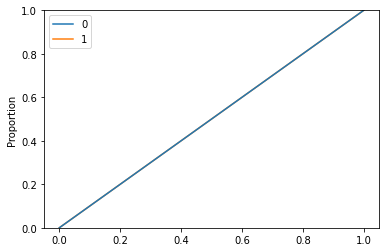

In [190]:
#sns.ecdfplot([michigan.iloc[19, :].values, irvine.iloc[19, :].values ])

Take absolute values of each difference and compute the average over all patients for each probe sets and obtain top 20 probe sets with highest magnitude.

In [221]:
top_probes_michigan = michigan_diff.mean().sort_values(ascending = False).iloc[:20]
top_probes_michigan
top_genes_michigan = np.array(genes.loc[top_probes_michigan.keys()].loc[:, 'sym'].values)
top_genes_michigan

array(['MYRIP', 'BHLHE40', 'WASF1', 'CTBP1', 'SLC25A36', 'CADPS', 'GLS',
       'PAIP1', 'KIFAP3', 'TRIM44', 'ALDH1A1', 'ATRX', 'KCNJ6', 'SLC12A5',
       'GAS7', 'DPP6', 'HCN2', 'TMEM66', 'INPP5F', 'TTC3'], dtype=object)

In [222]:
top_probes_irvine = irvine_diff.mean().sort_values(ascending = False).iloc[:20]
top_probes_irvine = np.array(genes.loc[top_probes_irvine.keys()].loc[:, 'sym'].values)
top_probes_irvine

array(['NEFH', 'CARTPT', 'NEFM', nan, 'PCSK1', 'PVALB', 'FGF9', 'CUX2',
       'NELL1', 'RGS7', 'ATP2B2', 'CDKL1', 'HIVEP2', 'RYR2', 'ATP2B2',
       'PRKCB', 'ATRNL1', 'SLC25A4', 'CAMTA1', 'FGF9'], dtype=object)

Map top probe sets to top genes using `genes` dataset. 

In [ ]:
def get_top_genes(lab):
  if(lab == 'M' or lab == 'I'):
    df = expression[(expression.index.str[5] == lab) & (expression.index.str[3] != 'c')]
    df_diff = df.diff().iloc[1::2,:]
    control_mean = df_diff[genes_c.index].iloc[:,-5:-1].apply(np.mean, axis=1)
    control_std = df_diff[genes_c.index].iloc[:, -5:-1].apply(np.std, axis = 1)
    df_diff = df_diff.sub(control_mean, axis='rows')
    df_diff = df_diff.div(control_std, axis='rows') 
  
  else:
    df = expression[(expression.index.str[5] == lab) & (expression.index.str[3] != 'c') & ~(expression.index.str[1].isin(['1', '2', '5', '6', '7', '9'])) ]
    df_diff = df.diff().iloc[1::2,:]
  top_probes = df_diff.abs().mean().sort_values(ascending = False).iloc[:20]
  top_genes = genes.loc[top_probes.keys()].loc[:, 'sym'].values
  return np.array(top_genes)


In [ ]:
top_genes_michigan = get_top_genes("M")
top_genes_irvine = get_top_genes("I")
#top_genes_davis = get_top_genes("D")
print(top_genes_irvine)
print(top_genes_michigan)
#print(top_genes_davis)

['NEFH' 'TF' 'NEFM' 'APOE' 'PLP1' 'SCN1B' 'VIM' 'C1orf61' 'CRYAB' 'SPP1'
 'MYH11' 'GFAP' 'NCDN' 'CRYAB' 'CABP1' 'HTRA1' 'ACTA2' 'NEFL' 'NTRK2'
 'GPRC5B']
['NCDN' 'NRGN' 'MDH1' 'STXBP1' 'RPL21' 'EEF1A2' 'CLASP2' 'VSNL1' 'AP2M1'
 'CBX6' 'TSPYL4' 'NPTN' 'GNAS' 'PFTK1' 'C16orf45' 'NCKAP1' 'CALM2' 'DNM1'
 'KCNJ4' 'NEFL']


## Hypothesis testing 
Wilcoxon signed-rank test for each gene(Remove controls).  
Tests whether the median of the difference is 0.  
A non-parametric alternative test to the paired t-test. 

In [213]:
from scipy.stats import wilcoxon
from scipy.stats import ttest_1samp
from statsmodels.stats.multitest import multipletests
# Remove controls(Probesets starting with 'AFFX')
michigan_diff = michigan_diff.filter(regex='^(?!AFFX).*$', axis=1)
irvine_diff = irvine_diff.filter(regex='^(?!AFFX).*$', axis=1)


p_val_M = michigan_diff.apply(ttest_1samp, popmean = 0).iloc[1,:].sort_values(ascending = True).iloc[:20]
print(p_val_M)

print('Michigan')

print('rejected H0(bonferroni):{}'.format(sum(multipletests(p_val_M, method='bonferroni')[0])))
print('rejected H0(BH):{} \n'.format(sum(multipletests(p_val_M, method='fdr_bh')[0])))


p_val_I = irvine_diff.apply(ttest_1samp, popmean = 0).iloc[1,:].sort_values(ascending = True).iloc[:20]
print(p_val_I)
print('Irvine')
print('rejected H0(bonferroni):{}'.format(sum(multipletests(p_val_I, method='bonferroni')[0])))
print('rejected H0(BH):{} \n'.format(sum(multipletests(p_val_I, method='fdr_bh')[0])))

36734_at      9.762118e-11
38741_at      9.173719e-10
39550_at      1.759291e-09
32192_g_at    3.973610e-09
766_at        6.578925e-09
32629_f_at    6.784016e-09
32919_at      1.937836e-08
765_s_at      2.100174e-08
32495_at      2.315446e-08
33043_at      2.316729e-08
34501_at      2.573971e-08
41301_at      2.998542e-08
33692_at      3.146910e-08
32259_at      3.689544e-08
1796_s_at     3.792147e-08
1316_at       4.968696e-08
35420_r_at    5.714929e-08
1728_at       5.769223e-08
31531_g_at    6.223161e-08
41281_s_at    6.384970e-08
Name: 1, dtype: float64
Michigan
rejected H0(bonferroni):20
rejected H0(BH):20 

33127_at      0.000132
35946_at      0.000161
35457_at      0.000220
38754_at      0.000342
33743_at      0.000363
36915_at      0.000480
32847_at      0.000493
41126_at      0.000525
36150_at      0.000575
41717_at      0.000621
37915_at      0.000628
37466_at      0.000666
41539_at      0.000673
509_at        0.000688
37788_at      0.000813
40625_f_at    0.000851
39031_at   

In [214]:
np.array(genes.loc[p_val_M.keys()].loc[:, 'sym'].values)

array(['SPRR2D', 'CYTH2', 'GLT25D2', 'PCGF2', 'LGALS9', 'BTN3A1',
       'AMIGO2', 'LGALS4', 'CLCN1', 'USP6', 'RUNX2', 'ITM2B', nan, 'EZH1',
       'BCL3', 'THRA', 'KIAA0913', 'BMI1', 'ACACB', 'PEX10'], dtype=object)

In [215]:
np.array(genes.loc[p_val_I.keys()].loc[:, 'sym'].values)

array(['LOXL2', 'NELL1', 'CARTPT', 'NUPR1', 'ATRNL1', 'CTSO', 'MYLK',
       'SLC1A4', 'PLEKHM2', 'FADS1', 'BAZ2B', 'RAB7L1', 'GRIN2C', 'SMAD4',
       nan, 'MTX1', 'COX7A1', 'IFFO1', nan, 'SMTN'], dtype=object)